<a href="https://colab.research.google.com/github/sonaopt1991/sonap/blob/main/promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
df1=pd.read_csv('/content/train_LZdllcl.csv')#train dataset
df2=pd.read_csv('/content/test_2umaH9m.csv')#test data set

**EDA** for train dataset

In [411]:
df1.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [412]:
df1.shape

(54808, 14)

In [413]:
df1.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [414]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [415]:
df1['employee_id'].nunique()

54808

In [416]:
df1=df1.drop('employee_id',axis=1)

In [417]:
#df1=df1.drop('gender',axis=1)

In [418]:
df1['region'].nunique()

34

In [419]:
df1.isnull().sum()# to identify null values

,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
KPIs_met >80%,0


Filling null values

In [420]:
df1['education']=df1['education'].fillna(df1['education'].mode()[0])#object data type hence mode
df1['previous_year_rating']=df1['previous_year_rating'].fillna(df1['previous_year_rating'].mean())#numerical data type


In [421]:
df1.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


<Axes: >

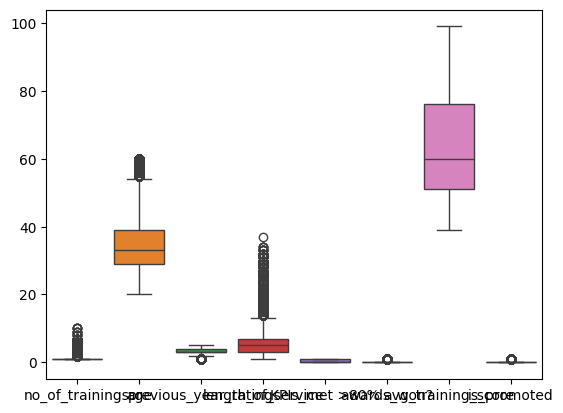

In [422]:
sns.boxplot(df1)

Encoding categorical variable

In [423]:
df1.dtypes

,0
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


In [424]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['department']=le.fit_transform(df1['department'])
df1['education']=le.fit_transform(df1['education'])
df1['gender']=le.fit_transform(df1['gender'])
df1['recruitment_channel']=le.fit_transform(df1['recruitment_channel'])
df1['region']=le.fit_transform(df1['region'])

In [425]:
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [426]:
df1.dtypes

,0
department,int64
region,int64
education,int64
gender,int64
recruitment_channel,int64
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


In [427]:
df1['is_promoted'].value_counts()

,count
is_promoted,
0,50140
1,4668


standardization...standard scaler

In [429]:
x1=df1.drop(['is_promoted'],axis=1)
y1=df1['is_promoted']

In [430]:
#  apply standard scasler on x1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)

In [431]:
type(x1_scaled)

numpy.ndarray

In [432]:
x1_scaled=pd.DataFrame(x1_scaled,columns=df1.columns[:-1])

In [433]:
x1_scaled.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.808933,1.776526,1.619758,-1.536223,1.154111,-0.415276,0.025598,1.378900,0.500460,1.356878,-0.154018,-1.075931
1,-0.388183,-0.163034,-0.628838,0.650947,-0.885239,-0.415276,-0.627135,1.378900,-0.437395,-0.736986,-0.154018,-0.253282
2,0.808933,-0.619401,-0.628838,0.650947,1.154111,-0.415276,-0.104948,-0.271742,0.265996,-0.736986,-0.154018,-1.001145
3,0.808933,-0.048942,-0.628838,0.650947,-0.885239,1.226063,0.547785,-1.922383,0.969387,-0.736986,-0.154018,-1.001145
4,1.207972,0.293333,-0.628838,0.650947,-0.885239,-0.415276,1.331064,-0.271742,-0.906322,-0.736986,-0.154018,0.718939


In [434]:
x2=x1_scaled

classification

In [435]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x2,y1=smote.fit_resample(x2,y1)


logistic regression

In [436]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y1,test_size=0.2,random_state=42)

In [437]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [438]:
y_pred=lr.predict(x_test)

In [439]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [440]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7146875627888286

Naive bayes

In [441]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [442]:
y_pred1=nb.predict(x_test)

In [443]:
f1_score(y_test,y_pred1)

0.6237930832699398

In [444]:
#  random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier( random_state=42)
rf_classifier.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(x_test)

# Evaluate the model
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest F1 Score: 0.9667516573176951


In [445]:
# xg boost

import xgboost as xgb
from sklearn.metrics import f1_score

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)  # You can tune hyperparameters here
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost F1 Score: {f1_xgb}")

XGBoost F1 Score: 0.9625260960334029


better f1 score is for random forest

Test dataset

In [446]:
df2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [447]:
df2=df2.drop('employee_id',axis=1)

In [448]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [449]:
df2.isnull().sum()

,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0
KPIs_met >80%,0


In [450]:
df2.dtypes

,0
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64
KPIs_met >80%,int64


In [451]:
df2['education']=df2['education'].fillna(df2['education'].mode()[0])#object data type hence mode
df2['previous_year_rating']=df2['previous_year_rating'].fillna(df2['previous_year_rating'].mean())#numerical data type


In [452]:
df2.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


Label encoder

In [453]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['department']=le.fit_transform(df2['department'])
df2['education']=le.fit_transform(df2['education'])
df2['gender']=le.fit_transform(df2['gender'])
df2['recruitment_channel']=le.fit_transform(df2['recruitment_channel'])
df2['region']=le.fit_transform(df2['region'])

In [454]:
df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,3.339146,1,1,0,77
1,2,28,0,0,0,1,31,3.000000,5,0,0,51
2,7,4,0,1,0,1,31,1.000000,4,0,0,47
3,5,11,0,0,0,3,31,2.000000,9,0,0,65
4,1,21,0,1,2,1,30,4.000000,7,0,0,61


standard scaling

In [455]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [456]:
type(df2_scaled)

numpy.ndarray

In [457]:
df2_scaled=pd.DataFrame(df2_scaled,columns=df2.columns)

In [458]:
df2_scaled.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.206058,0.290490,-0.637366,0.644516,1.154134,-0.423094,-1.404150,0.000000,-1.143200,1.336715,-0.152665,1.024263
1,-1.180154,1.436621,-0.637366,-1.551551,-0.883722,-0.423094,-0.492612,-0.279463,-0.192590,-0.748103,-0.152665,-0.914377
2,0.808356,-1.314094,-0.637366,0.644516,-0.883722,-0.423094,-0.492612,-1.927501,-0.430243,-0.748103,-0.152665,-1.212629
3,0.012952,-0.511802,-0.637366,-1.551551,-0.883722,2.905264,-0.492612,-1.103482,0.758019,-0.748103,-0.152665,0.129506
4,-1.577856,0.634329,-0.637366,0.644516,1.154134,-0.423094,-0.622832,0.544557,0.282714,-0.748103,-0.152665,-0.168746


#test using the test dataset ...trained random forest classifier is used

In [459]:
x3_test=df2_scaled

In [460]:
x3_test.shape

(23490, 12)

In [461]:
x1.shape

(54808, 12)

In [462]:
rf_classifier = RandomForestClassifier( random_state=42)
rf_classifier.fit(x_train, y_train)#old training data
# Make predictions
y3_pred_rf = rf_classifier.predict(x3_test)#new test data from dataset



In [463]:
y3_pred_rf


array([0, 0, 0, ..., 0, 0, 1])

In [464]:
#decesion tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)

In [465]:
f1_score(y_test,y_pred)

0.9339517999394978

In [466]:
y3_pred_dt=dt.predict(x3_test)

In [467]:
y3_pred_dt

array([0, 0, 0, ..., 0, 0, 1])

load the sample subm,ission csv


In [468]:
sample_submission=pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [469]:
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [470]:
sample_submission.columns

Index(['employee_id', 'is_promoted'], dtype='object')

In [471]:
sample_submission['is_promoted']=y3_pred_rf

In [472]:
sample_submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [473]:
#convert to csv
sample_submission.to_csv('sample_submission.csv', index=False)

In [474]:
# download this csv

from google.colab import files
files.download('sample_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>